In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = []
start = 0
for i in range(200):
    x = [np.sin(x / 10) for x in range(start, start + 11)]
    data.append(x)
    start = start + 1
    # print(x)

data = np.array(data)
data = torch.from_numpy(data)

target = data[:, - 1:].type(torch.FloatTensor)
data = data[:, :-1].type(torch.FloatTensor)

train_x = data[:150]
train_y = target[:150]
test_x = data[150:]
test_y = target[150:]

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)
train_loader = DataLoader(dataset=train_dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=5, shuffle=False)

In [3]:
"""构建网络"""
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 10, batch_first=True)
        self.lstm = nn.LSTM(1, 10, batch_first=True)
        self.gru = nn.GRU(1, 10, batch_first=True)
        self.fc = nn.Linear(10, 1)

    def forward(self, x, hidden):
        # output, hidden = self.rnn(x, hidden)
        # output, hidden = self.lstm(x, hidden)
        output, hidden = self.gru(x, hidden)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

net = model()
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=0.001)

In [4]:
"""
训练
初始化h0,c0
"""
h0 = torch.zeros(1, 5, 10)
c0 = torch.zeros(1, 5, 10)

for epoch in range(500):
    for i, data in enumerate(train_loader):
        x, y = data
        x = x.view(-1, 10, 1)

        pred = net(x, h0)
        loss = loss_fn(pred, y)

        opt.zero_grad()
        loss.backward()
        opt.step()

    if epoch % 50 == 0:
        print(loss.data)

tensor(0.4024)
tensor(0.0002)
tensor(1.3159e-05)
tensor(2.0973e-05)
tensor(1.6352e-06)
tensor(1.1048e-05)
tensor(1.4288e-05)
tensor(2.6010e-06)
tensor(5.0482e-06)
tensor(4.6458e-06)


tensor([[-0.2879, -0.3821, -0.4724, -0.5581, -0.6381]])
tensor([[-0.2867, -0.3808, -0.4713, -0.5572, -0.6375]]) 

tensor([[-0.7118, -0.7784, -0.8371, -0.8876, -0.9291]])
tensor([[-0.7112, -0.7778, -0.8363, -0.8864, -0.9275]]) 

tensor([[-0.9614, -0.9841, -0.9969, -0.9998, -0.9927]])
tensor([[-0.9593, -0.9816, -0.9942, -0.9970, -0.9901]]) 

tensor([[-0.9756, -0.9488, -0.9126, -0.8672, -0.8132]])
tensor([[-0.9735, -0.9471, -0.9113, -0.8662, -0.8122]]) 

tensor([[-0.7510, -0.6813, -0.6048, -0.5223, -0.4346]])
tensor([[-0.7499, -0.6799, -0.6030, -0.5202, -0.4323]]) 

tensor([[-0.3425, -0.2470, -0.1490, -0.0495,  0.0504]])
tensor([[-0.3404, -0.2452, -0.1477, -0.0488,  0.0507]]) 

tensor([[0.1499, 0.2478, 0.3433, 0.4354, 0.5231]])
tensor([[0.1498, 0.2476, 0.3429, 0.4349, 0.5226]]) 

tensor([[0.6055, 0.6820, 0.7516, 0.8137, 0.8676]])
tensor([[0.6050, 0.6814, 0.7508, 0.8127, 0.8664]]) 

tensor([[0.9129, 0.9491, 0.9758, 0.9928, 0.9998]])
tensor([[0.9113, 0.9471, 0.9735, 0.9901, 0.9970]]) 

tens

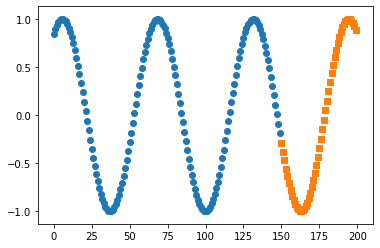

In [5]:
"""测试"""
preds = []
for i, data in enumerate(test_loader):
    x, y = data
    x = x.view(-1, 10, 1)
    hidden = torch.zeros(1, 5, 10)
    pred = net(x, h0)
    preds.append(pred.data.numpy())
    print(y.view(1, -1).data)
    print(pred.view(1, -1).data, '\n')

plt.scatter(range(len(train_y)), train_y.data.numpy(), marker='o')
plt.scatter(range(150, 200), preds, marker='s')
plt.show()